In [12]:
import cv2
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt



In [13]:
from matplotlib import rcParams
# 设置中文字体
rcParams['font.sans-serif'] = ['SimHei']  # 指定黑体（或其他支持中文的字体）
rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

In [14]:
# 加载图像
image_path = Path('IMG/C.png')
image = cv2.imread(str(image_path), cv2.IMREAD_GRAYSCALE)
# 检查图像是否加载成功
if image is None:
    print("错误：图像未找到或无法加载。")
else:
    print("图像加载成功。")



图像加载成功。


In [15]:

# 图像预处理：归一化处理，灰度化
image = cv2.equalizeHist(image)  # 直方图均衡化，增加对比度

# 定义Laplacian滤波器
laplacian_filter = np.array([[0, 1, 0],
                             [1, -4, 1],
                             [0, 1, 0]])

# 使用Laplacian滤波器进行卷积操作，突出细长血管结构
filtered_image = cv2.filter2D(image, -1, laplacian_filter)

# 增强图像，增加对比度
enhanced_image = cv2.addWeighted(image, 1.5, filtered_image, 0.5, 0)



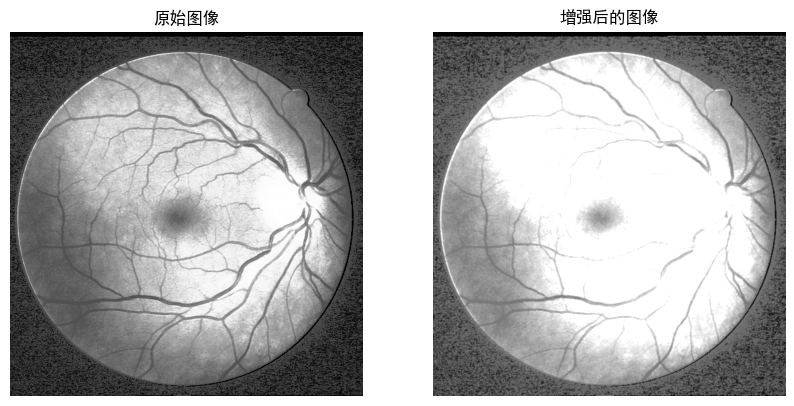

True

In [16]:
# 显示原图和增强图
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('原始图像')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(enhanced_image, cmap='gray')
plt.title('增强后的图像')
plt.axis('off')

plt.show()

# 保存增强后的图像
cv2.imwrite('enhanced_vascular_image.jpg', enhanced_image)